# Assignment: Linear Models
## Foundations of Machine Learning
## Do Q1 and one other question

**Q1.** Load `./data/Q1_clean.csv`. The data include

- `Price` per night
- `Review Scores Rating`: The average rating for the property
- `Neighbourhood `: The bourough of NYC. Note the space, or rename the variable.
- `Property Type`: The kind of dwelling
- `Room Type`: The kind of space being rented


1. Compute the average prices and scores by Neighbourhood; which bourough is the most expensive on average? Create a kernel density plot of price and log price, grouping by Neighbourhood.

Manhattan is the most expensive neighborhood, with an average price of 183.66.

                  Price                                                      \
                  count        mean         std   min     25%    50%    75%   
Neighbourhood                                                                 
Bronx             217.0   75.276498   39.755468  10.0   50.00   60.0   90.0   
Brooklyn         8487.0  127.747378  106.038466  20.0   75.00  100.0  150.0   
Manhattan       11763.0  183.664286  170.434606  25.0  103.00  150.0  214.0   
Queens           1590.0   96.857233   61.712648  25.0   60.00   80.0  115.0   
Staten Island      96.0  146.166667  508.462029  35.0   54.75   71.0   99.0   

                         
                    max  
Neighbourhood            
Bronx             244.0  
Brooklyn         4500.0  
Manhattan       10000.0  
Queens            950.0  
Staten Island    5000.0  
               Review Scores Rating                                         \
                              count       mean       std   min   25%   50%   
Nei

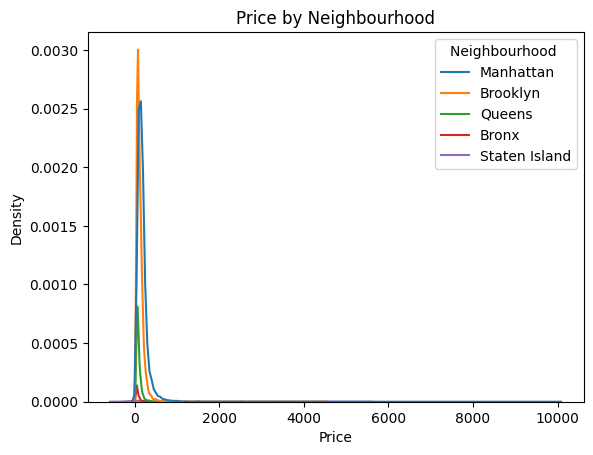

Text(0.5, 1.0, 'Log Price by Neighbourhood')

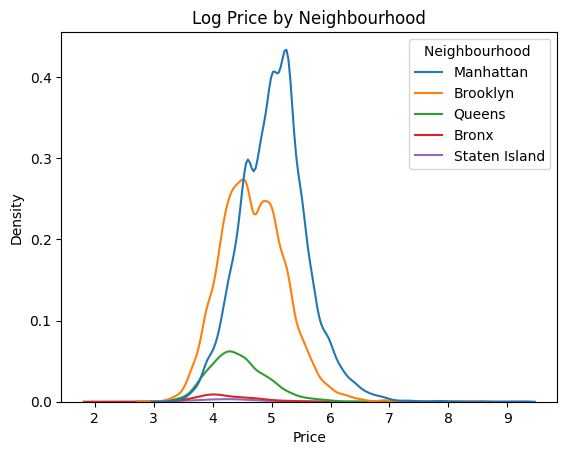

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv("./data/Q1_clean.csv")

df.head()

# Average Prices
print(df.loc[:, ['Price', 'Neighbourhood ']].groupby('Neighbourhood ').describe())

# Average Scores
print(df.loc[:, ['Review Scores Rating', 'Neighbourhood ']].groupby('Neighbourhood ').describe())

sns.kdeplot(data=df, x='Price', hue='Neighbourhood ')
plt.title('Price by Neighbourhood')
plt.show()
sns.kdeplot(data=df, x=np.log(df['Price']), hue='Neighbourhood ')
plt.title('Log Price by Neighbourhood')

2. Regress price on Neighbourhood by creating the appropriate dummy/one-hot-encoded variables, without an intercept in the linear model and using all the data. Compare the coefficients in the regression to the table from part 1. What pattern do you see? What are the coefficients in a regression of a continuous variable on one categorical variable?

The coefficients are the mean prices from question 1. This is because there are no other variables for the model to regress on, causing it to just return the mean.

In [3]:
from sklearn.linear_model import LinearRegression
y = df['Price']
X = pd.get_dummies(df['Neighbourhood '])

reg = LinearRegression(fit_intercept=False).fit(X, y)

# get the coefficients
results = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_})
results

,variable,coefficient
0,Bronx,75.276498
1,Brooklyn,127.747378
2,Manhattan,183.664286
3,Queens,96.857233
4,Staten Island,146.166667


3. Repeat part 2, but leave an intercept in the linear model. How do you have to handle the creation of the dummies differently? What is the intercept? Interpret the coefficients. How can I get the coefficients in part 2 from these new coefficients?

Because we are leaving an intercept for the model, we must drop the first variable. The intercept is the Bronx variable's coefficient. The coefficients are in terms of the Bronx's average price. To get the coefficients from part 2, you can just add 75.276 to each of them.

In [5]:
from sklearn.linear_model import LinearRegression
y = df['Price']
X = pd.get_dummies(df['Neighbourhood '], drop_first=True)

reg = LinearRegression().fit(X, y)
results = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_})
results

,variable,coefficient
0,Brooklyn,52.470881
1,Manhattan,108.387789
2,Queens,21.580735
3,Staten Island,70.890169


4. Split the sample 80/20 into a training and a test set. Run a regression of Price on Review Scores Rating and Neighbourhood. What is the  R2  and RMSE on the test set? What is the coefficient on Review Scores Rating? What is the most expensive kind of property you can rent?

The R2 is .067 and the RMSE is 125.0109. The coefficient on Review Scores Rating is 1.0322. The most expensive kind of property you can rent is in Manhattan.




In [7]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model

y = df['Price']
X = df.loc[:, ['Review Scores Rating', 'Neighbourhood ']]

# Split the sample 80/20
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=100)

Z_train = pd.concat([X_train['Review Scores Rating'],
                     pd.get_dummies(X_train['Neighbourhood '], dtype='int')], axis = 1)
Z_test = pd.concat([X_test['Review Scores Rating'],
                    pd.get_dummies(X_test['Neighbourhood '], dtype='int')], axis = 1)

# Run regression of price and review scores rating
reg = linear_model.LinearRegression(fit_intercept=False).fit(Z_train,y_train)

# Get the R2 and RMSE
y_hat = reg.predict(Z_test)
print('R2: ', reg.score(Z_test,y_test))
rmse = np.sqrt( np.mean( (y_test-y_hat)**2 ))
print('RMSE: ', rmse)

results = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_})
results

R2:  0.06701086106947296
RMSE:  125.01092061382933


,variable,coefficient
0,Review Scores Rating,1.032257
1,Bronx,-17.261392
2,Brooklyn,32.180888
3,Manhattan,89.421020
4,Queens,4.050208
5,Staten Island,61.576393


5. Split the sample 80/20 into a training and a test set. Run a regression of Price on Review Scores Rating and Neighbourhood and Room Type. What is the  R2  and RMSE on the test set? What is the coefficient on Review Scores Rating? What is the most expensive kind of property you can rent?

The R2 is .2204 and the RMSE is 114.2769. The coefficient on the Review Scores Rating is .627. The most expensive kind of property you can rent is an entire home/apartment in Manhattan.

In [9]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
y = df['Price']
X = df.loc[:, ['Review Scores Rating', 'Neighbourhood ', 'Room Type']]

# Split the sample 80/20
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=100)

Z_train = pd.concat([X_train['Review Scores Rating'],
                     pd.get_dummies(X_train['Neighbourhood '], dtype='int'),
                    pd.get_dummies(X_train['Room Type'], dtype='int')], axis = 1)
Z_test = pd.concat([X_test['Review Scores Rating'],
                    pd.get_dummies(X_test['Neighbourhood '], dtype='int'),
                  pd.get_dummies(X_test['Room Type'], dtype='int')], axis = 1)

# Run a regression of Price on Review Scores Rating and Neighbourhood and Property Type
reg = linear_model.LinearRegression(fit_intercept=False).fit(Z_train,y_train)

# Get R2 and RMSE on the test set
y_hat = reg.predict(Z_test)
print('R2: ', reg.score(Z_test,y_test))
rmse = np.sqrt( np.mean( (y_test - y_hat)**2 ))
print('RMSE: ', rmse)

results = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_}) # Regression coefficients
results

R2:  0.22035348129282306
RMSE:  114.27692123130633


,variable,coefficient
0,Review Scores Rating,0.626912
1,Bronx,-13.022765
2,Brooklyn,10.378456
3,Manhattan,53.693304
4,Queens,-6.833330
5,Staten Island,50.003022
6,Entire home/apt,110.617820
7,Private room,3.101341
8,Shared room,-19.500474


6. What does the coefficient on Review Scores Rating mean if it changes from part 4 to 5? Hint: Think about how multilple linear regression works.

Multiple linear regressions work by adjusting the SSE to include more than one variable of interest, so that multiple predictors can be combined into one model. From part 4 to 5, the coefficient on Review Scores Rating changed from 1.032 to .627. Because the coefficient decreased when adding room type to the model in part 5, this means that the room type of the rentals accounts for a lot of variation in price.

**Q2.** This question is a case study for linear models. The data are about car prices. In particular, they include:

  - `Price`, `Color`, `Seating_Capacity`
  - `Body_Type`: crossover, hatchback, muv, sedan, suv
  - `Make`, `Make_Year`: The brand of car and year produced
  - `Mileage_Run`: The number of miles on the odometer
  - `Fuel_Type`: Diesel or gasoline/petrol
  - `Transmission`, `Transmission_Type`:  speeds and automatic/manual


1. Load cars_hw.csv. These data were really dirty, and I've already cleaned them a significant amount in terms of missing values and other issues, but some issues remain (e.g. outliers, badly scaled variables that require a log or arcsinh transformation). Clean the data however you think is most appropriate.

<Axes: >

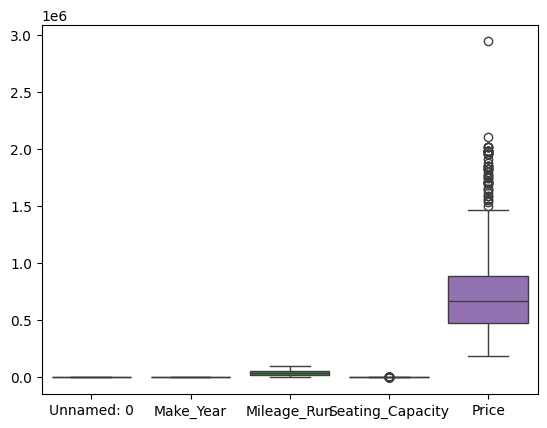

In [35]:
df = pd.read_csv("./data/cars_hw.csv")

# Make a boxplot to see how the variables are scaled
sns.boxplot(data=df)

<Axes: >

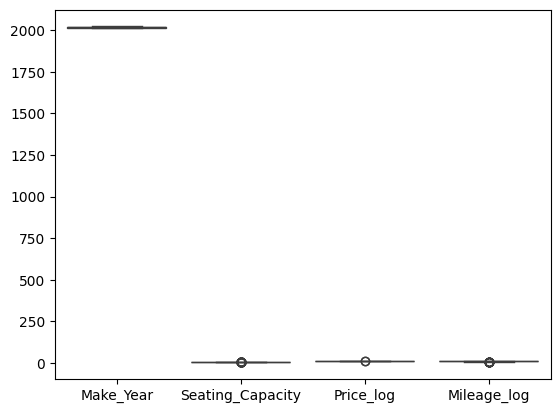

In [36]:
# Price and Mileage need to be scaled down by taking their log
# Seating capacity doesn't need to be scaled down
df['Price_log'] = np.log(df['Price'])
df['Mileage_log'] = np.log(df['Mileage_Run'])
# Unnamed isn't needed
df = df.drop(['Price','Mileage_Run','Unnamed: 0'],axis=1)
sns.boxplot(data=df)

<Axes: >

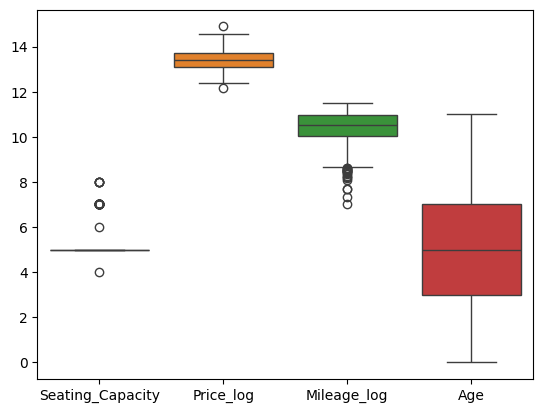

In [37]:
# Need to convert the make year into age. Get the most recent make year and calculate how much older the cars are

df["Age"] = max(df['Make_Year']) - df['Make_Year']
df = df.drop(['Make_Year'],axis=1)
sns.boxplot(data=df)

2. Summarize the Price variable and create a kernel density plot. Use .groupby() and .describe() to summarize prices by brand (Make). Make a grouped kernel density plot by Make. Which car brands are the most expensive? What do prices look like in general?

The most expensive car brand is MG Motors, which has an average log price of 14.439. Kia is the second most expensive, with an average log price of 14.292, and Jeep is the third most expensive brand, with an average log price of 14.216. Most of the brands have a large price peak between 13 and 14.

               count       mean       std        min        25%        50%  \
Make                                                                         
Chevrolet        6.0  12.919895  0.480975  12.495004  12.568392  12.752286   
Datsun           3.0  12.576047  0.036311  12.538967  12.558302  12.577636   
Ford            52.0  13.468280  0.210895  12.577636  13.361380  13.469493   
Honda           73.0  13.536318  0.336972  12.663497  13.272506  13.573439   
Hyundai        305.0  13.368511  0.398781  12.421184  13.091904  13.366094   
Jeep             4.0  14.216591  0.105084  14.070153  14.183270  14.240265   
Kia              8.0  14.292177  0.076877  14.129591  14.272242  14.303105   
MG Motors       35.0  14.439052  0.066263  14.278615  14.395744  14.429615   
Mahindra        18.0  13.898953  0.159906  13.587354  13.851808  13.905680   
Maruti Suzuki  293.0  13.218132  0.371409  12.375815  12.926348  13.174956   
Nissan           4.0  13.641194  0.392610  13.071070  13.537775 

<Axes: xlabel='Price_log', ylabel='Density'>

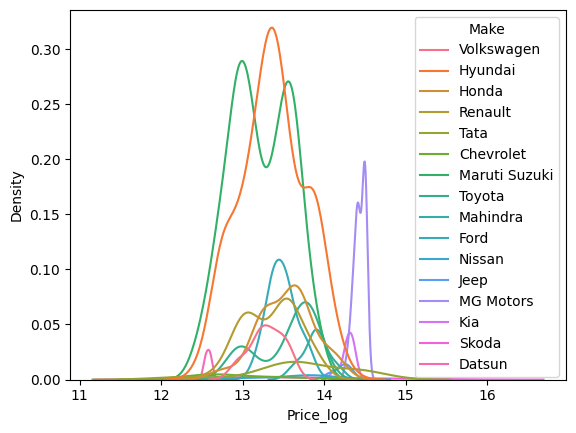

In [38]:
print(df['Price_log'].groupby(df['Make']).describe())
sns.kdeplot(data = df, x='Price_log',hue='Make')

3. Split the data into an 80% training set and a 20% testing set.

In [40]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model

print(df.describe())  # there are 976 rows

df = df.sample(frac=1, random_state=100)

# split 80% of the data into the training set
train_data = df[:int(976 * .8)]
y_train = train_data['Price_log']

# split 20% of the data
test_data = df[int(976 * .8):]
y_test = test_data['Price_log']

       Seating_Capacity   Price_log  Mileage_log         Age
count        976.000000  976.000000   976.000000  976.000000
mean           5.095287   13.411033    10.416288    5.036885
std            0.446224    0.450276     0.733389    2.818742
min            4.000000   12.144197     7.018402    0.000000
25%            5.000000   13.072647    10.029093    3.000000
50%            5.000000   13.409795    10.533972    5.000000
75%            5.000000   13.691080    10.958169    7.000000
max            8.000000   14.894260    11.507863   11.000000


4. Make a model where you regress price on the numeric variables alone; what is the  R2  and RMSE on the training set and test set? Make a second model where, for the categorical variables, you regress price on a model comprised of one-hot encoded regressors/features alone (you can use pd.get_dummies(); be careful of the dummy variable trap); what is the  R2  and RMSE on the test set? Which model performs better on the test set? Make a third model that combines all the regressors from the previous two; what is the  R2  and RMSE on the test set? Does the joint model perform better or worse, and by home much?

For the numeric variables, the R2 is .475 and the RMSE is .315. For the categorical variables, the R2 is .630 and the RMSE is .265. The categorical model performs better on the test set because it has a higher R2 value.


The combined R2 is .801 and the RMSE is .194. The joint model performs better than the numeric and categorical models because it has the highest R2 and lowest RMSE. The combined R2 is higher than the numeric R2 by .326 and higher than the categorical R2 by .171. The combined RMSE is lower than the numeric RMSE by .121 and is lower than the categorical RMSE by .071.



In [46]:
# the numeric variables are age, mileage, and seating capacity

X_train_num = train_data.loc[:, ['Age', 'Mileage_log', 'Seating_Capacity']] # Process training covariates
reg_num = linear_model.LinearRegression().fit(X_train_num,y_train) # Run regression
X_test_num = test_data.loc[:,['Age', 'Mileage_log', 'Seating_Capacity']] # Process test covariates

y_hat = reg_num.predict(X_test_num)

# Get R2 and RMSE on the numeric test set
print('Numeric R2: ', reg_num.score(X_test_num,y_test))
rmse_num = np.sqrt( np.mean( (y_test - y_hat)**2 ))
print('Numeric RMSE: ', rmse_num)

# the categorical varaibles are color, make, body type, fuel type, transmission, and transmission type
categorical = ['Color', 'Make', 'Body_Type', 'Fuel_Type', 'Transmission', 'Transmission_Type']

all_dummies = pd.DataFrame([])

color_dummies = pd.get_dummies( df.loc[:,'Color'], drop_first=True, dtype=int)
all_dummies = pd.concat([all_dummies, color_dummies], axis=1, ignore_index=True)
X_train_cat = all_dummies.iloc[0:int(976*.8),:]
X_test_cat = all_dummies.iloc[int(976*.8):,:]

make_dummies = pd.get_dummies( df.loc[:,'Make'], drop_first=True, dtype=int)
all_dummies = pd.concat([all_dummies, make_dummies], axis=1, ignore_index=True)
X_train_cat = all_dummies.iloc[0:int(976*.8),:]
X_test_cat = all_dummies.iloc[int(976*.8):,:]

body_type_dummies = pd.get_dummies( df.loc[:,'Body_Type'], drop_first=True, dtype=int)
all_dummies = pd.concat([all_dummies, body_type_dummies], axis=1, ignore_index=True)
X_train_cat = all_dummies.iloc[0:int(976*.8),:]
X_test_cat = all_dummies.iloc[int(976*.8):,:]

fuel_type_dummies = pd.get_dummies( df.loc[:,'Fuel_Type'], drop_first=True, dtype=int)
all_dummies = pd.concat([all_dummies, fuel_type_dummies], axis=1, ignore_index=True)
X_train_cat = all_dummies.iloc[0:int(976*.8),:]
X_test_cat = all_dummies.iloc[int(976*.8):,:]

transmission_dummies = pd.get_dummies( df.loc[:,'Transmission'], drop_first=True, dtype=int)
all_dummies = pd.concat([all_dummies, transmission_dummies], axis=1, ignore_index=True)
X_train_cat = all_dummies.iloc[0:int(976*.8),:]
X_test_cat = all_dummies.iloc[int(976*.8):,:]

transmission_type_dummies = pd.get_dummies( df.loc[:,'Fuel_Type'], drop_first=True, dtype=int)
all_dummies = pd.concat([all_dummies, transmission_type_dummies], axis=1, ignore_index=True)
X_train_cat = all_dummies.iloc[0:int(976*.8),:]
X_test_cat = all_dummies.iloc[int(976*.8):,:]

# Get the categorical regression
reg_cat = linear_model.LinearRegression().fit(X_train_cat,y_train) # Run regression
y_hat = reg_cat.predict(X_test_cat)

# Get R2 and RMSE on the numeric test set
print('Categorical R2: ', reg_cat.score(X_test_cat,y_test))
rmse_cat = np.sqrt( np.mean( (y_test - y_hat)**2 ))
print('Categorical RMSE: ', rmse_cat)

# Get the combined regression
X_train_combined = pd.concat([X_train_num, X_train_cat],axis=1, ignore_index=True)
X_test_combined = pd.concat([X_test_num, X_test_cat],axis=1, ignore_index=True)

reg_combined = linear_model.LinearRegression().fit(X_train_combined,y_train)
y_hat_combined = reg_combined.predict(X_test_combined)
print('Combined R2: ', reg_combined.score(X_test_combined,y_test))
rmse_combined = np.sqrt( np.mean( (y_test - y_hat_combined)**2 ))
print('Combined RMSE: ', rmse_combined)


Numeric R2:  0.47500291653796844
Numeric RMSE:  0.3153065263124809
Categorical R2:  0.6299358060090376
Categorical RMSE:  0.26472383628674384
Combined R2:  0.801132198496003
Combined RMSE:  0.19406032346062838


5. Use the PolynomialFeatures function from sklearn to expand the set of numerical variables you're using in the regression. As you increase the degree of the expansion, how do the  R2  and RMSE change? At what point does  R2  go negative on the test set? For your best model with expanded features, what is the  R2  and RMSE? How does it compare to your best model from part 4?

As you increase the expansion past degree 3, the R2 and RSME get worse. The R2 goes negative at degree 4. The best expanded model is degree 3, where R2 is .794 and RSME is .197. This model is slightly worse than the combined model from part 4.

In [47]:
from sklearn.preprocessing import PolynomialFeatures

# increase the degree of the expander
for degree in np.arange(1,10):
    expander = PolynomialFeatures(degree=degree,include_bias=False)

    Z = expander.fit_transform(X_test_num)
    names = expander.get_feature_names_out()
    X_test_degree = pd.DataFrame(data=Z, columns = names)

    Z = expander.fit_transform(X_train_num)
    names = expander.get_feature_names_out()
    X_train_degree = pd.DataFrame(data=Z, columns = names)
    X_train_degree.reset_index(drop=True, inplace=True)
    X_train_cat.reset_index(drop=True, inplace=True)
    X_train_all = pd.concat([X_train_degree, X_train_cat], axis=1, ignore_index=True)

    X_test_degree.reset_index(drop=True, inplace=True)
    X_test_cat.reset_index(drop=True, inplace=True)
    X_test_all = pd.concat([X_test_degree, X_test_cat], axis=1, ignore_index=True)

    reg_all = linear_model.LinearRegression().fit(X_train_all,y_train)
    print(degree, ' R2: ', reg_all.score(X_test_all,y_test))
    y_hat_all = reg_all.predict(X_test_all)
    rmse_all = np.sqrt( np.mean( (y_test - y_hat_all)**2 ))
    print(degree, 'RMSE: ', rmse_all)


1  R2:  0.801132198496003
1 RMSE:  0.19406032346062838
2  R2:  0.7918016364294992
2 RMSE:  0.1985606429613292
3  R2:  0.794978099730718
3 RMSE:  0.1970401102711042
4  R2:  -32067233787997.91
4 RMSE:  2464252.8281239183
5  R2:  0.0532531965578642
5 RMSE:  0.4234200687702923
6  R2:  -121.54976308538414
6 RMSE:  4.817378306804055
7  R2:  -22953441.048599593
7 RMSE:  2084.86733462248
8  R2:  -24525436.96928932
8 RMSE:  2155.077538466993
9  R2:  -8234273844.194973
9 RMSE:  39488.18454705001


6. For your best model so far, determine the predicted values for the test data and plot them against the true values. Do the predicted values and true values roughly line up along the diagonal, or not? Compute the residuals/errors for the test data and create a kernel density plot. Do the residuals look roughly bell-shaped around zero? Evaluate the strengths and weaknesses of your model.

Based on the scatterplot, it appears that the predicted values and true values roughtly line up. The residuals are bell shaped around zero on the kernal density plot. A strength of the model is that it is unimodal and very symetric around zero.

Combined R2:  0.801132198496003
Combined RMSE:  0.19406032346062838


<Axes: xlabel='Price_log'>

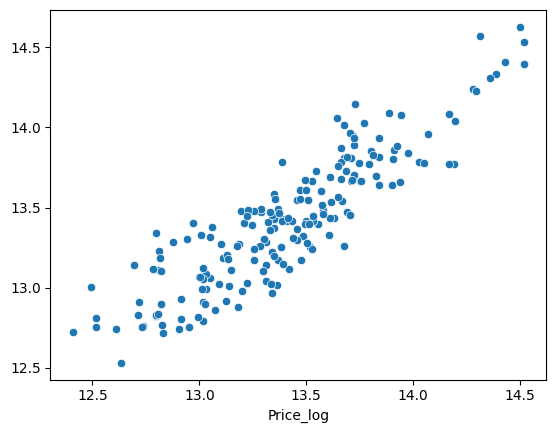

In [51]:
reg_combined = linear_model.LinearRegression().fit(X_train_combined,y_train)
y_hat_combined = reg_combined.predict(X_test_combined)
print('Combined R2: ', reg_combined.score(X_test_combined,y_test))
rmse_combined = np.sqrt( np.mean( (y_test - y_hat_combined)**2 ))
print('Combined RMSE: ', rmse_combined)

sns.scatterplot(x=y_test, y=y_hat_combined)

<Axes: xlabel='Price_log', ylabel='Density'>

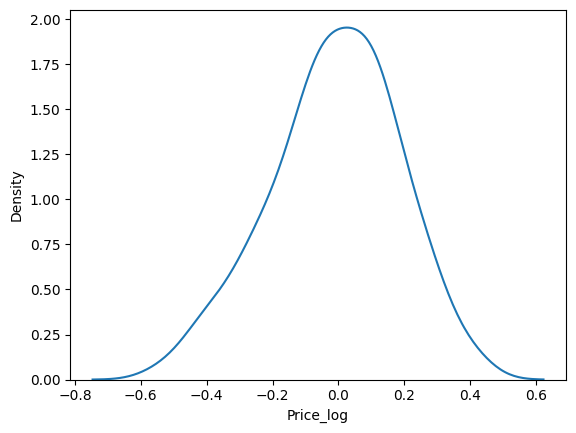

In [52]:
residuals = y_test - y_hat_combined
sns.kdeplot(residuals)

**Q3.** This is a question about linear regression. The outcome is whether a defendant is held pre-trial in the Virginia justice system. We would like to understand how that outcome is predicted by characteristics of the defendant, particularly race. Let's be very careful/clear: We aren't saying anyone *should* be held without bond or asserting that people with different demographic variables *should* be more likely to be held, but instead trying to predict whether people with different characteristics *are empirically more likely* to be held without bond, given the available information. This is the first step we would take in investigating whether a system is fair, or how large the disparities are: Does it treat people with similar observable characteristics similarly, or not? We are going to look at a common question: Are Black defendants treated differently from white or Asian ones? (There are Native American defendants, but there are 11 in total, which is such a small number of observations that is difficult to clearly say anything about how this group is treated relative to the others.)

The variables in the data are:

  - `held_wo_bail`: Whether a defendant is held without bail before trial (Boolean logical)
  - `race`, `sex`: Categorical demographic variables
  - `is_poor`: Whether the defendant is classified as indigent
  - `prior_F`, `prior_M`: The number of prior felony and misdemeanor arrests
  - `case_type`: A categorical variable indicating a misdemeanor `M` or felony `F` or infraction `I` or special case `S`
  - `age`: Defendant's age
  - `bond`, `bond_NA`, `bond_type`: The amount of any bond, whether it is missing, and the type
  - `sentence`, `sentence_NA`, `sentence_type`: The length of any sentence, whether it is missing, and the type

1. Load the `pretrial_data.csv` data. Notice that there are `nan`s, but the data are relatively clean. Because there are `.nan`s among variables you won't use, you'll want to narrow down your analysis to the relevant variables before dropping or imputing missing values.
2. Create a dummy variable indicating that the defendant is Black.
3. Regress `held` on `Black`. What is the slope coefficient Interpret the coefficient on the Black dummy variable: How much more likely is a black person to be held without bail? What is the $R^2$ of the model?
4. Before doing this question, please think for a few minutes about how to make the process of running the following regressions as efficient as possible, before jumping into writing code. Repeat part 2, for the following specifications, keeping track of the coefficient on the Black dummy variable each time:
      - `held` on `Black` and `sex`
      - `held` on `Black` and `sex` and `is_poor`
      - `held` on `Black` and `sex` and `is_poor` and `prior_F`
      - `held` on `Black` and `sex` and `is_poor` and `prior_F` and `case_type`
What happens to the coefficient on the Black dummy variable as you include more regressors/features/controls in the regression? Explain your findings.
5. Suppose we don't want to see just `Black` and `sex`, but `Black` interacted with `sex`: Are Black men and Black women treated systemically differently from the rest of the population? Implement this in a regression, and explain your findings.
6. Imagine someone argued we should use these kinds of models to help a judge or magistrate make bail decisions (you could obviously go back and make this kind of model for the bond and sentence variables, then deploy it on new cases to predict what their bond and sentence values would be). What concerns would you have? Do you think society should be using data-driven and automated tools like that? Explain your concerns clearly.

**Q4.** This is a math question to review the derivation of the OLS estimator (but only if you are into that kind of thing!). We are going to do it slightly differently from what we did in class, though. We will use a linear predictor and minimize the Sum of Squared Errors, just as in class. But, we are going to de-mean $X$ first, creating another variable $z_i = x_i - \bar{x}$ where
$$
\bar{x} = \dfrac{1}{N} \sum_{i=1}^N x_i,
$$
so the model is $\hat{y}_i = a + b z_i$ and the `SSE` is
$$
\text{SSE}(a,b) = \sum_{i=1}^N (y_i - a - bz_i)^2.
$$

  1. Take partial derivatives of the `SSE` with respect to $a$ and $b$. You should get

\begin{alignat*}{3}
\sum_{i=1}^N -2(y_i - a- bz_i) &=& 0 \\
\sum_{i=1}^N -2(y_i - a - bz_i)z_i &=& 0.
\end{alignat*}

  2. Solve for the solutions to the above equations. Big hint: $\bar{z} = 0$, since we subtracted the mean of $x$ from $x$ to get $z$. You should get

\begin{alignat*}{3}
a^* &=& \bar{y} \\
b^* &=& \dfrac{\sum_{i=1}^N(y_i - \bar{y})z_i}{\sum_{i=1}^N z_i^2}.
\end{alignat*}

  3. Substitute $z_i = x_i - \bar{x}$ back into the above equations. You should get
  
\begin{alignat*}{3}
a^* &=& \bar{y} \\
b^* &=& \dfrac{\sum_{i=1}^N(y_i - \bar{y})(x_i-\bar{x})}{\sum_{i=1}^N (x_i-\bar{x})^2},
\end{alignat*}

which can be written in terms of sample covariance and sample variance as:

\begin{alignat*}{3}
a^* &=& \bar{y} \\
b^* &=& \dfrac{\text{cov}(x,y)}{\text{var}(x)}.
\end{alignat*}

This is typically the preferred way of expressing the OLS coefficients.

4. When will $b^*$ be large or small, depending on the relationship between $x$ and $y$ and the amount of "noise"/variance in $x$? What does $a^*$ represent?
5. Suppose you have measurement error in $x$ which artificially inflates its variance (e.g. bad data cleaning). What happens to the $b^*$ coefficient? How will affect your ability to predict? (This phenomenon is called **attenuation**.)

**Q5.**
1. Find a dataset on a topic you're interested in. Some easy options are data.gov, kaggle.com, and data.world.
2. Clean the data and do some exploratory data analysis on key variables that interest you. Pick a particular target/outcome variable and features/predictors.
3. Split the sample into an ~80% training set and a ~20% test set.
4. Run a few regressions of your target/outcome variable on a variety of features/predictors. Compute the SSE on the test set.
5. Which model performed the best, and why?
6. What did you learn?